In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [26]:
path_to_kids = 'data/data_original/kids_v2.csv'
df_kids = pd.read_csv(path_to_kids, na_values=['-', 'Unraced'], sep=';')

path_to_mums = 'data/data_original/mums_v2.csv'
df_mums = pd.read_csv(path_to_mums, na_values='-',  sep=';')

path_to_dads = 'data/data_original/dads_v2.csv'
df_dads = pd.read_csv(path_to_dads, na_values='-',  sep=';')

In [27]:
df_kids.head()

,dziecko id,nazwa dziecka,liczba startów,1. miejsce,2. miejsce,3. miejsce,rasa,sex,ojciecID,matkaID,value
0,1,Thatch,11,8,0,0,TB,S,S2,D1,"132,570"
1,2,Lisadell,5,2,1,0,TB,F,S2,D1,"30,739"
2,3,King Pellinore,20,11,2,2,TB,S,S3,D1,"631,605"
3,4,Marinsky,5,1,2,1,TB,M,S4,D1,"8,963"
4,5,Baryshnikov,24,1,2,2,TB,S,S4,D1,"4,799"


In [28]:
df_mums.head()

,Dam ID,Dam Name,Start Count,1st Place,2nd Place,3rd Place,Value,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,D1,Thong,22.0,5.0,4.0,5.0,"50,036",NaN,NaN,NaN,NaN
1,D2,Be Ambitious,22.0,3.0,5.0,3.0,"12,650",NaN,NaN,NaN,NaN
2,D3,Lady Dulcinea,26.0,4.0,4.0,5.0,"45,420",NaN,NaN,NaN,NaN
3,D4,Triple Orbit,3.0,1.0,0.0,0.0,"891,000",NaN,NaN,NaN,NaN
4,D5,Perverse,21.0,4.0,2.0,1.0,"11,640",NaN,NaN,NaN,NaN


In [29]:
df_dads.head()

,Sire ID,Sire Name,Start Count,1st Place,2nd Place,3rd Place,Value,Height,Colour,Unnamed: 9,Unnamed: 10
0,S1,Bold Ruler,33.0,23.0,4.0,2.0,"764,204",167.0,Brown,NaN,NaN
1,S2,Forli,10.0,9.0,1.0,0.0,"156,410",165.0,Chestnut,NaN,NaN
2,S3,Round Table,66.0,43.0,8.0,5.0,"1,749,869",NaN,Bay,NaN,NaN
3,S4,Northern Dancer,18.0,14.0,2.0,2.0,"580,806",156.0,Bay,NaN,NaN
4,S5,Damascus,32.0,21.0,7.0,3.0,"1,176,781",163.0,Bay,NaN,NaN


In [30]:
df_mums.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)
df_dads.drop(['Unnamed: 9', 'Unnamed: 10', 'Colour'], axis=1, inplace=True)

df_kids.columns = ['kid_id', 'kid_name', 'num_of_starts', 'first_place', 'second_place', 'third_place', 'race', 'sex', 'dad_id', 'mum_id', 'value']
df_mums.columns = ['mum_id', 'mum_name', 'mum_num_of_starts', 'mum_first_place', 'mum_second_place', 'mum_third_place', 'mum_value']
df_dads.columns = ['dad_id', 'dad_name', 'dad_num_of_starts', 'dad_first_place', 'dad_second_place', 'dad_third_place', 'dad_value', 'dad_height']

df_kids.dropna(inplace=True)
df_kids['num_of_starts'] = df_kids['num_of_starts'].astype(np.float64)
df_kids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 82
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kid_id         79 non-null     int64  
 1   kid_name       79 non-null     object 
 2   num_of_starts  79 non-null     float64
 3   first_place    79 non-null     int64  
 4   second_place   79 non-null     int64  
 5   third_place    79 non-null     int64  
 6   race           79 non-null     object 
 7   sex            79 non-null     object 
 8   dad_id         79 non-null     object 
 9   mum_id         79 non-null     object 
 10  value          79 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 7.4+ KB


In [31]:
# joining on correct id's
merged_df_intermidiate = pd.merge(df_kids, df_mums, how='inner', on='mum_id')
merged_df = pd.merge(merged_df_intermidiate, df_dads, how='inner', on='dad_id')
merged_df.head()

,kid_id,kid_name,num_of_starts,first_place,second_place,third_place,race,sex,dad_id,mum_id,...,mum_second_place,mum_third_place,mum_value,dad_name,dad_num_of_starts,dad_first_place,dad_second_place,dad_third_place,dad_value,dad_height
0,1,Thatch,11.0,8,0,0,TB,S,S2,D1,...,4.0,5.0,"50,036",Forli,10.0,9.0,1.0,0.0,"156,410",165.0
1,2,Lisadell,5.0,2,1,0,TB,F,S2,D1,...,4.0,5.0,"50,036",Forli,10.0,9.0,1.0,0.0,"156,410",165.0
2,3,King Pellinore,20.0,11,2,2,TB,S,S3,D1,...,4.0,5.0,"50,036",Round Table,66.0,43.0,8.0,5.0,"1,749,869",NaN
3,4,Marinsky,5.0,1,2,1,TB,M,S4,D1,...,4.0,5.0,"50,036",Northern Dancer,18.0,14.0,2.0,2.0,"580,806",156.0
4,5,Baryshnikov,24.0,1,2,2,TB,S,S4,D1,...,4.0,5.0,"50,036",Northern Dancer,18.0,14.0,2.0,2.0,"580,806",156.0


In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kid_id             79 non-null     int64  
 1   kid_name           79 non-null     object 
 2   num_of_starts      79 non-null     float64
 3   first_place        79 non-null     int64  
 4   second_place       79 non-null     int64  
 5   third_place        79 non-null     int64  
 6   race               79 non-null     object 
 7   sex                79 non-null     object 
 8   dad_id             79 non-null     object 
 9   mum_id             79 non-null     object 
 10  value              79 non-null     object 
 11  mum_name           79 non-null     object 
 12  mum_num_of_starts  79 non-null     float64
 13  mum_first_place    79 non-null     float64
 14  mum_second_place   79 non-null     float64
 15  mum_third_place    79 non-null     float64
 16  mum_value          69 non-nu

In [33]:
# changing sex to 0- female, 1- male
FEMALE = 0
MALE = 1

sex_dict = {'S': MALE, 'M': MALE, 'F': FEMALE}
merged_df['sex_bin'] = merged_df.sex.map(sex_dict)

# changing avlue to numeric val
for column in ['value', 'dad_value', 'mum_value']:
    new_col_name = column + '_numeric'
    merged_df[new_col_name] = merged_df[column].str.replace('[$,]', '', regex=True).astype(float)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kid_id             79 non-null     int64  
 1   kid_name           79 non-null     object 
 2   num_of_starts      79 non-null     float64
 3   first_place        79 non-null     int64  
 4   second_place       79 non-null     int64  
 5   third_place        79 non-null     int64  
 6   race               79 non-null     object 
 7   sex                79 non-null     object 
 8   dad_id             79 non-null     object 
 9   mum_id             79 non-null     object 
 10  value              79 non-null     object 
 11  mum_name           79 non-null     object 
 12  mum_num_of_starts  79 non-null     float64
 13  mum_first_place    79 non-null     float64
 14  mum_second_place   79 non-null     float64
 15  mum_third_place    79 non-null     float64
 16  mum_value          69 non-nu

In [34]:
merged_only_stalions = merged_df[merged_df['sex_bin'] == MALE]
merged_only_stalions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 77
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kid_id             40 non-null     int64  
 1   kid_name           40 non-null     object 
 2   num_of_starts      40 non-null     float64
 3   first_place        40 non-null     int64  
 4   second_place       40 non-null     int64  
 5   third_place        40 non-null     int64  
 6   race               40 non-null     object 
 7   sex                40 non-null     object 
 8   dad_id             40 non-null     object 
 9   mum_id             40 non-null     object 
 10  value              40 non-null     object 
 11  mum_name           40 non-null     object 
 12  mum_num_of_starts  40 non-null     float64
 13  mum_first_place    40 non-null     float64
 14  mum_second_place   40 non-null     float64
 15  mum_third_place    40 non-null     float64
 16  mum_value          34 non-nu

In [45]:
merged_only_dams = merged_df[merged_df['sex_bin'] == FEMALE]
merged_only_dams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 78
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kid_id             39 non-null     int64  
 1   kid_name           39 non-null     object 
 2   num_of_starts      39 non-null     float64
 3   first_place        39 non-null     int64  
 4   second_place       39 non-null     int64  
 5   third_place        39 non-null     int64  
 6   race               39 non-null     object 
 7   sex                39 non-null     object 
 8   dad_id             39 non-null     object 
 9   mum_id             39 non-null     object 
 10  value              39 non-null     object 
 11  mum_name           39 non-null     object 
 12  mum_num_of_starts  39 non-null     float64
 13  mum_first_place    39 non-null     float64
 14  mum_second_place   39 non-null     float64
 15  mum_third_place    39 non-null     float64
 16  mum_value          35 non-nu

In [61]:
interesting_columns = ['kid_id', 'dad_id', 'mum_id', 'value_numeric', 'dad_value_numeric', 
                       'mum_value_numeric', 'num_of_starts', 'dad_num_of_starts', 'mum_num_of_starts', 
                       'first_place', 'dad_first_place', 'dad_second_place', 'dad_third_place', 
                       'mum_first_place', 'mum_second_place', 'mum_third_place', 'dad_height']
# interesting_columns = ['kid_id', 'dad_id', 'mum_id', 'value_numeric', 
#                        'mum_value_numeric', 'num_of_starts', 'mum_num_of_starts', 
#                        'first_place',
#                        'mum_first_place', 'mum_second_place', 'mum_third_place']
full_data_after_prep = merged_only_stalions[interesting_columns]
full_data_after_prep.head()

,kid_id,dad_id,mum_id,value_numeric,dad_value_numeric,mum_value_numeric,num_of_starts,dad_num_of_starts,mum_num_of_starts,first_place,dad_first_place,dad_second_place,dad_third_place,mum_first_place,mum_second_place,mum_third_place,dad_height
0,1,S2,D1,132570.0,156410.0,50036.0,11.0,10.0,22.0,8,9.0,1.0,0.0,5.0,4.0,5.0,165.0
2,3,S3,D1,631605.0,1749869.0,50036.0,20.0,66.0,22.0,11,43.0,8.0,5.0,5.0,4.0,5.0,NaN
3,4,S4,D1,8963.0,580806.0,50036.0,5.0,18.0,22.0,1,14.0,2.0,2.0,5.0,4.0,5.0,156.0
4,5,S4,D1,4799.0,580806.0,50036.0,24.0,18.0,22.0,1,14.0,2.0,2.0,5.0,4.0,5.0,156.0
7,58,S5,D9,209211.0,1176781.0,18120.0,54.0,32.0,22.0,14,21.0,7.0,3.0,3.0,1.0,6.0,163.0


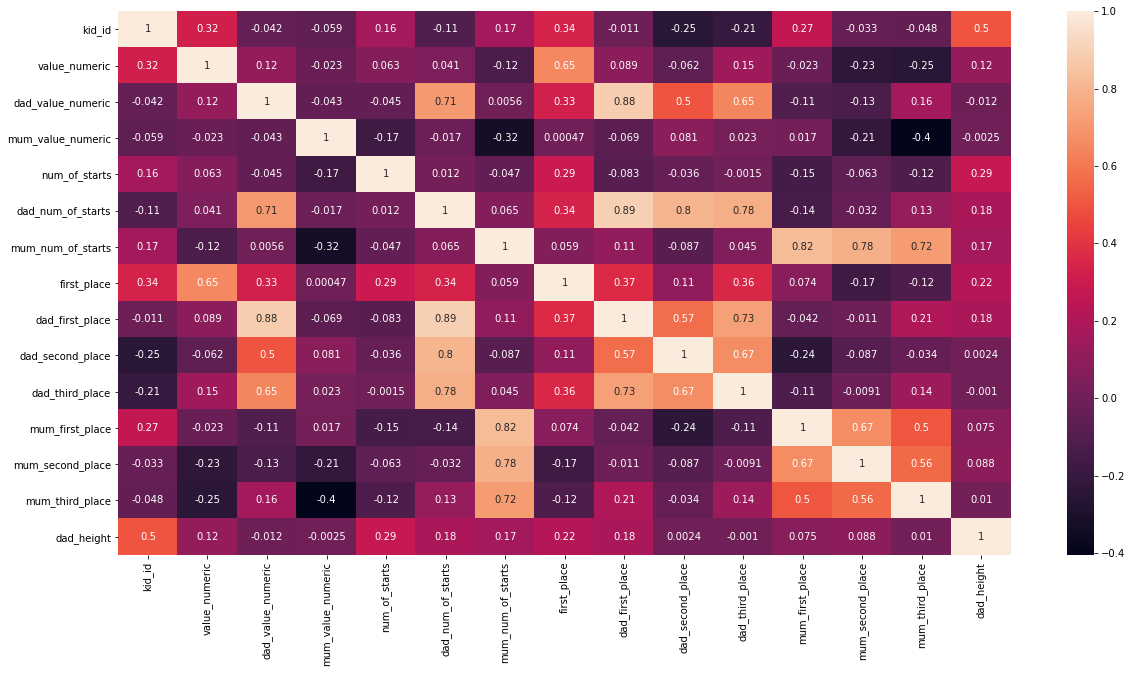

In [62]:
corr_matrix = full_data_after_prep.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()
# clear that the dad has way more influence on the performance of the stallion, especially on the amount of first places, which in turn has the most
# impact on the value of the stalion in itself

# when choosing coefficients mum's will have to be 2x smaller

In [65]:
chosen_columns = ['kid_id', 'mum_id', 'dad_id', 'value_numeric', 'first_place',
                  'mum_num_of_starts', 
                  'dad_value_numeric', 
                  'dad_first_place', 'dad_second_place', 'dad_third_place',
                  'dad_num_of_starts']
final_final_data = merged_only_stalions[chosen_columns]
final_final_data.head()



,kid_id,mum_id,dad_id,value_numeric,first_place,mum_num_of_starts,dad_value_numeric,dad_first_place,dad_second_place,dad_third_place,dad_num_of_starts
0,1,D1,S2,132570.0,8,22.0,156410.0,9.0,1.0,0.0,10.0
2,3,D1,S3,631605.0,11,22.0,1749869.0,43.0,8.0,5.0,66.0
3,4,D1,S4,8963.0,1,22.0,580806.0,14.0,2.0,2.0,18.0
4,5,D1,S4,4799.0,1,22.0,580806.0,14.0,2.0,2.0,18.0
7,58,D9,S5,209211.0,14,22.0,1176781.0,21.0,7.0,3.0,32.0


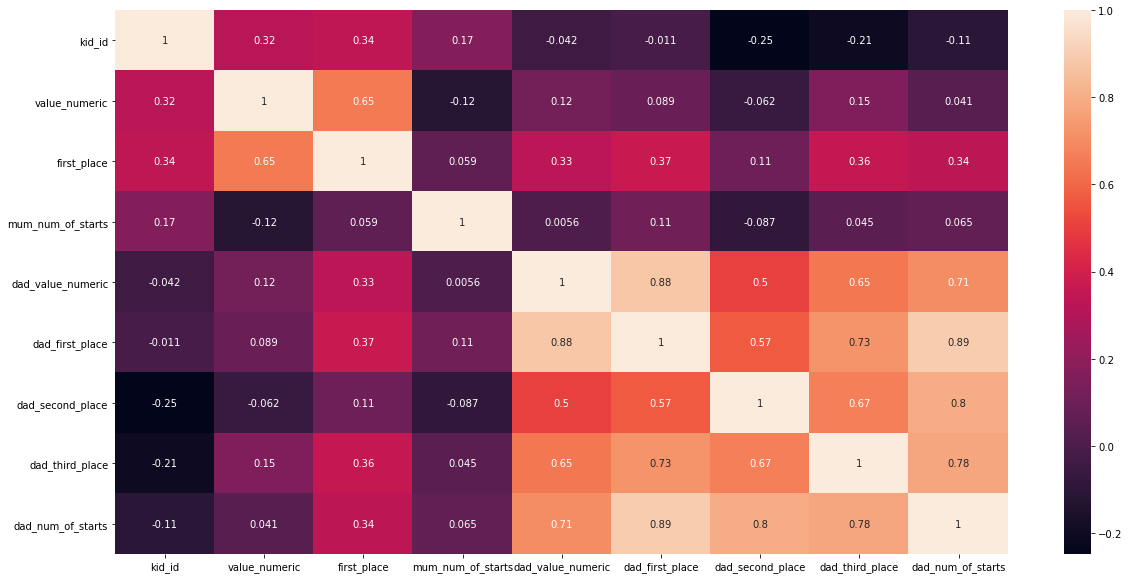

In [66]:
corr_matrix = final_final_data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [67]:
final_final_data.to_csv('data/data_prepared/only_stalions_prepared.csv')
print('saved to csv')

saved to csv
